# **CNN_MNIST_Tensorflow Training**


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")


11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28)
Test labels shape: (10000, 10)


In [3]:
input_width = 28
input_height = 28
input_channels = 1
input_pixels = 784

n_conv1 = 32
n_conv2 = 64
stride_conv1 = 1
stride_conv2 = 1
conv1_k = 5
conv2_k = 5
max_pool1_k = 2
max_pool2_k = 2

n_hidden = 1024
n_out = 10

input_size_to_hidden = (input_width//(max_pool1_k*max_pool2_k)) * (input_height//(max_pool1_k*max_pool2_k)) *n_conv2

In [5]:
import tensorflow as tf

# Define the hyperparameters and dimensions
conv1_k = 3  # Kernel size for conv1
conv2_k = 3  # Kernel size for conv2
input_channels = 1  # Number of input channels
n_conv1 = 32  # Number of filters for conv1
n_conv2 = 64  # Number of filters for conv2
input_size_to_hidden = 7 * 7 * 64  # Example value; depends on your network architecture
n_hidden = 1024  # Number of neurons in the fully connected layer
n_out = 10  # Number of output classes

# Initialising the weights with random values
weights = {
    "wc1": tf.Variable(tf.random.normal([conv1_k, conv1_k, input_channels, n_conv1])),
    "wc2": tf.Variable(tf.random.normal([conv2_k, conv2_k, n_conv1, n_conv2])),
    "wh1": tf.Variable(tf.random.normal([input_size_to_hidden, n_hidden])),
    "wo": tf.Variable(tf.random.normal([n_hidden, n_out]))
}

biases = {
    "bc1": tf.Variable(tf.random.normal([n_conv1])),
    "bc2": tf.Variable(tf.random.normal([n_conv2])),
    "bh1": tf.Variable(tf.random.normal([n_hidden])),
    "bo": tf.Variable(tf.random.normal([n_out]))
}

# Verify the shapes
for key in weights:
    print(f'{key} shape: {weights[key].shape}')
for key in biases:
    print(f'{key} shape: {biases[key].shape}')


wc1 shape: (3, 3, 1, 32)
wc2 shape: (3, 3, 32, 64)
wh1 shape: (3136, 1024)
wo shape: (1024, 10)
bc1 shape: (32,)
bc2 shape: (64,)
bh1 shape: (1024,)
bo shape: (10,)


In [6]:
def conv(x, weights, bias, strides = 1):
    out = tf.nn.conv2d(x, weights, padding="SAME", strides = [1, strides, strides, 1])
    out = tf.nn.bias_add(out, bias)
    out = tf.nn.relu(out)
    return out

def maxpooling(x, k = 2):
    return tf.nn.max_pool(x, padding = "SAME", ksize = [1, k, k, 1], strides = [1, k, k, 1])

In [7]:
def cnn(x, weights, biases, keep_prob):
    x = tf.reshape(x, shape = [-1 ,input_height, input_width, input_channels])
    conv1 = conv(x, weights['wc1'], biases['bc1'], stride_conv1)
    conv1_pool = maxpooling(conv1, max_pool1_k)

    conv2 = conv(conv1_pool, weights['wc2'], biases['bc2'], stride_conv2)
    conv2_pool = maxpooling(conv2, max_pool2_k)

    hidden_input = tf.reshape(conv2_pool, shape = [-1, input_size_to_hidden])
    hidden_output_before_activation = tf.add(tf.matmul(hidden_input, weights['wh1']), biases['bh1'])
    hidden_output_before_dropout = tf.nn.relu(hidden_output_before_activation)
    hidden_output = tf.nn.dropout(hidden_output_before_dropout, keep_prob)

    output = tf.add(tf.matmul(hidden_output, weights['wo']), biases['bo'])
    return output

In [8]:
import tensorflow as tf

# Define input layers using tf.keras.Input
input_pixels = 784  # Example input size (e.g., for MNIST)
x = tf.keras.Input(shape=(input_pixels,), dtype=tf.float32)
y = tf.keras.Input(shape=(n_out,), dtype=tf.int32)
keep_prob = tf.keras.Input(shape=(), dtype=tf.float32)

# Example CNN function using tf.keras.layers (you need to define this)
def cnn(x, weights, biases, keep_prob):
    # Define the CNN architecture using tf.keras.layers
    pass

pred = cnn(x, weights, biases, keep_prob)

print("Inputs and model created using TensorFlow 2.x Keras API.")


Inputs and model created using TensorFlow 2.x Keras API.


In [9]:
import tensorflow as tf

# Ensure that TensorFlow 2.x is being used
assert tf.__version__.startswith('2'), "TensorFlow 2.x is required!"

# Define hyperparameters and dimensions
conv1_k = 3  # Kernel size for conv1
conv2_k = 3  # Kernel size for conv2
input_channels = 1  # Number of input channels
n_conv1 = 32  # Number of filters for conv1
n_conv2 = 64  # Number of filters for conv2
input_size_to_hidden = 7 * 7 * 64  # Example value; depends on your network architecture
n_hidden = 1024  # Number of neurons in the fully connected layer
n_out = 10  # Number of output classes
input_pixels = 784  # Example input size (e.g., for MNIST)

# Define the CNN model using tf.keras.layers
def cnn_model():
    inputs = tf.keras.Input(shape=(28, 28, 1), name='input_layer')
    x = tf.keras.layers.Conv2D(filters=n_conv1, kernel_size=(conv1_k, conv1_k), padding='same', activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(filters=n_conv2, kernel_size=(conv2_k, conv2_k), padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units=n_hidden, activation='relu')(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    outputs = tf.keras.layers.Dense(units=n_out, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Create the model
model = cnn_model()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, n_out)
y_test = tf.keras.utils.to_categorical(y_test, n_out)

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0     

In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load MNIST data
mnist_data, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

# Split the data
mnist_train, mnist_test = mnist_data['train'], mnist_data['test']

# Normalize the data
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.0
    label = tf.one_hot(label, 10)
    return image, label

mnist_train = mnist_train.map(normalize)
mnist_test = mnist_test.map(normalize)

# Batch and shuffle the data
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 10000

mnist_train = mnist_train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
mnist_test = mnist_test.batch(BATCH_SIZE)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(mnist_train, epochs=5)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(mnist_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Get predictions and correct predictions
predictions = model.predict(mnist_test)
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.concat([y for x, y in mnist_test], axis=0)
true_labels = tf.argmax(true_labels, axis=1)

correct_predictions = tf.equal(predicted_labels, true_labels)
accuracy = tf.reduce_sum(tf.cast(correct_predictions, tf.float32))
total_predictions = true_labels.shape[0]
accuracy_percentage = (accuracy.numpy() / total_predictions) * 100

print(f'Number of correct predictions: {accuracy.numpy()}')
print(f'Total number of predictions: {total_predictions}')
print(f'Accuracy: {accuracy.numpy() / total_predictions:.4f}')
print(f'Accuracy Percentage: {accuracy_percentage:.2f}%')



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2951 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1433 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1078 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0872 - accuracy: 0.9726
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0751 - accuracy: 0.9776
Test accuracy: 0.9776
313/313 [==============================] - 1s 4ms/step
Number of correct predictions: 9776.0
Total number of predictions: 10000
Accuracy: 0.9776
Accuracy Percentage: 97.76%


# **`CNN_keras_MNIST Training `**

In [11]:
#importing the necessary modules
from keras.datasets import mnist
import numpy as np


In [12]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

Training data:


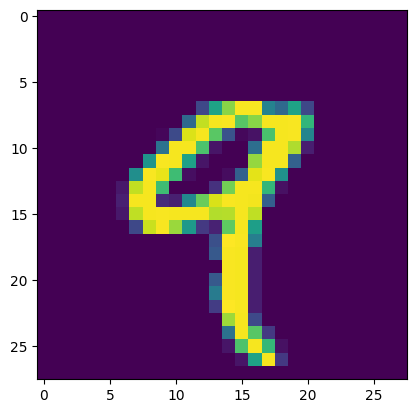

Label of this image is 9


In [13]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])

In [14]:

#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [15]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [16]:
from tensorflow.keras.utils import to_categorical

# Assuming ytrain and ytest are your labels
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)


In [17]:
#importing the model
from keras.models import Sequential

In [18]:
#creating model object
model=Sequential()


In [19]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [20]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))


In [21]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


Epoch 1/5
600/600 [==============================] - 206s 344ms/step - loss: 0.0108 - accuracy: 0.9963 - val_loss: 0.0378 - val_accuracy: 0.9897
Epoch 2/5
600/600 [==============================] - 193s 322ms/step - loss: 0.0116 - accuracy: 0.9960 - val_loss: 0.0278 - val_accuracy: 0.9910
Epoch 3/5
600/600 [==============================] - 190s 317ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0360 - val_accuracy: 0.9909
Epoch 4/5
600/600 [==============================] - 190s 317ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0321 - val_accuracy: 0.9916
Epoch 5/5
600/600 [==============================] - 191s 318ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.0318 - val_accuracy: 0.9918


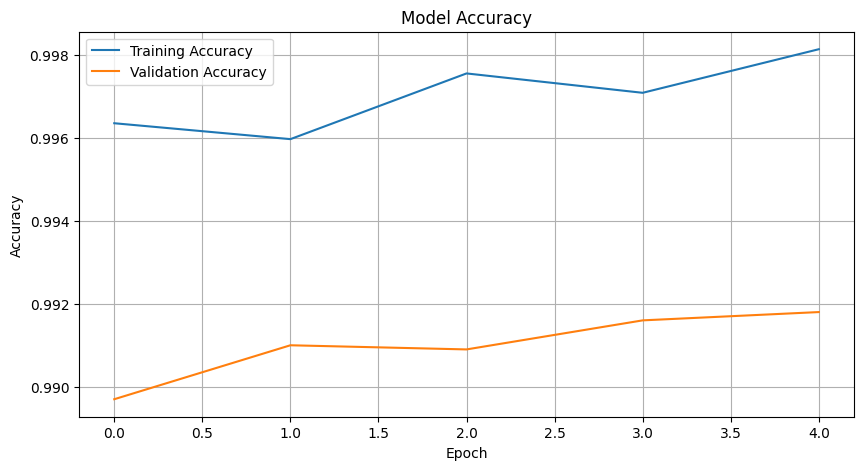

In [24]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model
history = model.fit(xtrain, y_train, batch_size=100, epochs=5, validation_data=(xtest, y_test))

# Plotting the accuracy
plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [25]:
#model train and test scores
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

313/313 [==============================] - 10s 30ms/step - loss: 0.0318 - accuracy: 0.9918


([0.0033094172831624746, 0.9989333152770996],
 [0.03180605173110962, 0.9918000102043152])